In [1]:
import numpy as np, uproot as ur, awkward as ak, pandas as pd, uproot as ur
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy.interpolate import CubicSpline

import mplhep as hep
plt.figure()
hep.style.use("CMS")

import uproot,glob,ROOT

<Figure size 640x480 with 0 Axes>

In [2]:
arrays={}
arrays['muon']=ur.open(f"data/muon_4GeV.edm4hep.root:events").arrays()
arrays['proton']=ur.open(f"data/proton_2GeV.edm4hep.root:events").arrays()
arrays['positron']=ur.open(f"data/positron_4GeV.edm4hep.root:events").arrays()

for a in arrays.values():
    z=a['HcalFarForwardZDCHits.position.z']
    a['HcalFarForwardZDCHits.layer']=(z-5002.756)/(5029.868-5002.756)

Text(0.5, 1.0, 'Muon Energy Deposition per Cell')

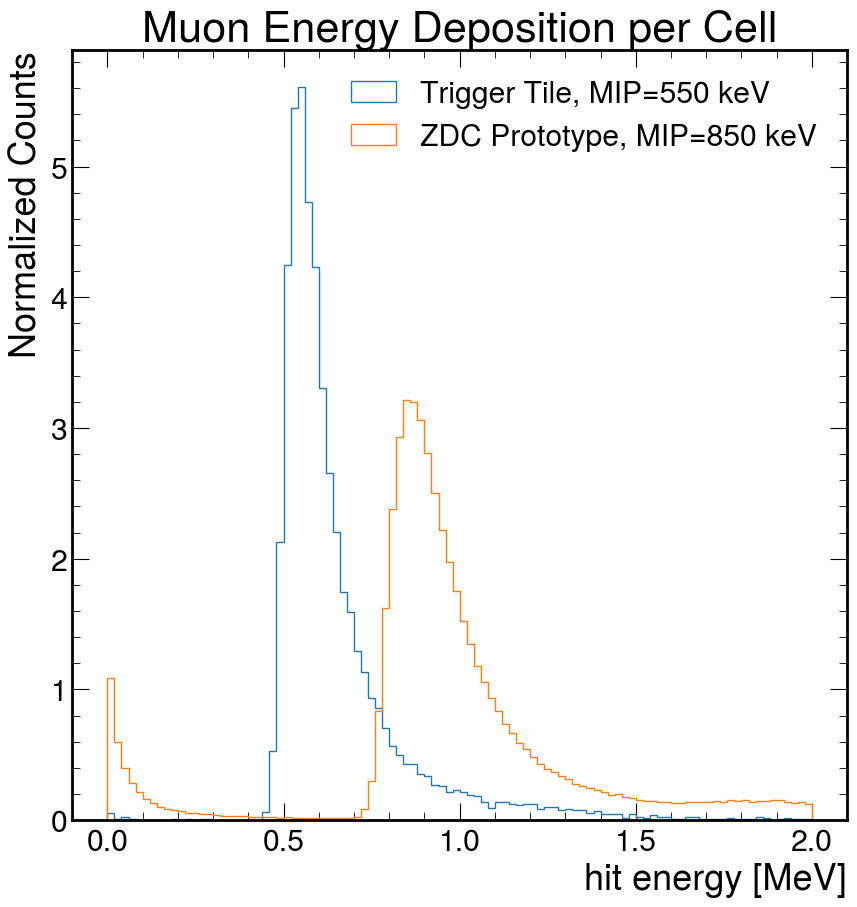

In [3]:
y,x,_=plt.hist(ak.flatten(arrays['muon']["TriggerHits.energy"])*1000, label=f'muons',histtype='step', bins=100, range=(0, 2), density=True)
bc=(x[1:]+x[:-1])/2
MIP_trigger=list(bc[y==max(y)])[0]
#plt.axvline(MIP*1000)

y,x,_=plt.hist(ak.flatten(arrays['muon']['HcalFarForwardZDCHits.energy'])*1000, label=f'muons',histtype='step', bins=100, range=(0, 2), density=True)
bc=(x[1:]+x[:-1])/2
MIP=list(bc[y==max(y)])[0]
#plt.axvline(MIP*1000)
plt.legend(labels=[f'Trigger Tile, MIP={MIP_trigger*1000:.0f} keV',f'ZDC Prototype, MIP={MIP*1000:.0f} keV'])

plt.ylabel("Normalized Counts")
plt.xlabel("hit energy [MeV]")
plt.title("Muon Energy Deposition per Cell")

Text(0.5, 1.0, 'Cut: Both Trigger Tile > 0.5 MIP')

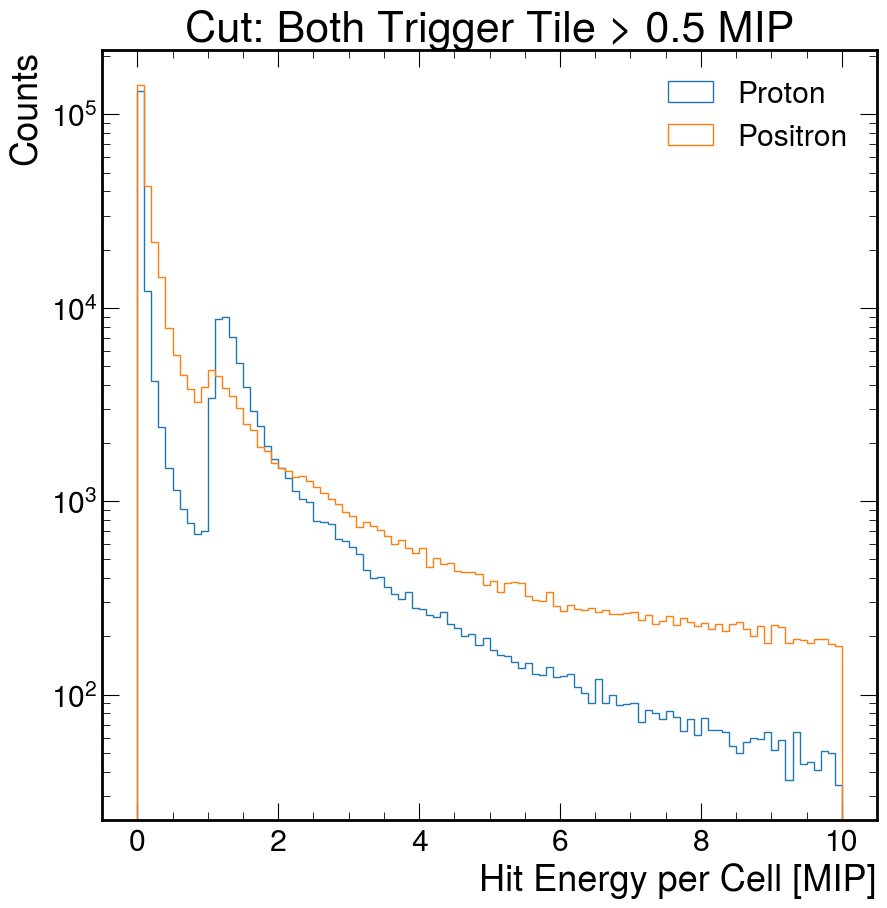

In [4]:
#trigger_cut = arrays['proton']['TriggerHits.energy'] > 0.5*MIP_trigger/1000
trigger_cut = [True if len(cells)==2 else False for cells in (arrays['proton']['TriggerHits.energy'] > 0.5*MIP_trigger/1000)]
y,x,_=plt.hist(ak.flatten(arrays['proton']['HcalFarForwardZDCHits.energy'][trigger_cut])*1000/MIP,histtype='step', bins=100, density=False,range=(0,10), label='Proton')
trigger_cut = [True if len(cells)==2 else False for cells in (arrays['positron']['TriggerHits.energy'] > 0.5*MIP_trigger/1000)]
y,x,_=plt.hist(ak.flatten(arrays['positron']['HcalFarForwardZDCHits.energy'][trigger_cut])*1000/MIP,histtype='step', bins=100, density=False,range=(0,10), label='Positron')
plt.ylabel("Counts")
plt.xlabel("Hit Energy per Cell [MIP]")
plt.yscale('log')
plt.legend()
plt.title('Cut: Both Trigger Tile > 0.5 MIP')

Text(0.5, 1.0, 'Cut: Both Trigger Tile > 0.5 MIP; Cell Hits > 0.5 MIP')

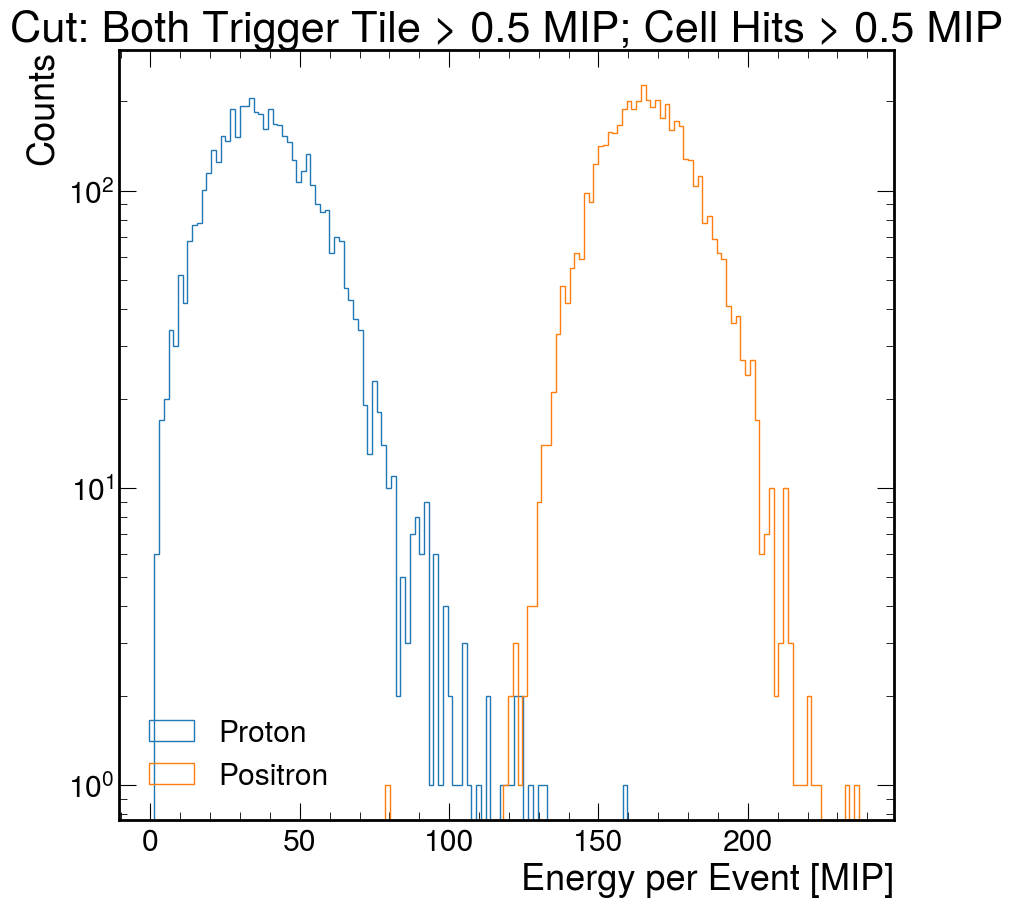

In [5]:
trigger_cut = [True if len(cells)==2 else False for cells in (arrays['proton']['TriggerHits.energy'] > 0.5*MIP_trigger/1000)]
cut = arrays['proton']['HcalFarForwardZDCHits.energy'][trigger_cut]>0.5*MIP/1000
b = np.sum(arrays['proton']['HcalFarForwardZDCHits.energy'][trigger_cut][cut], axis=-1)*1000/MIP
plt.hist(b,histtype='step', bins=100,density=False,label='Proton')

trigger_cut = [True if len(cells)==2 else False for cells in (arrays['positron']['TriggerHits.energy'] > 0.5*MIP_trigger/1000)]
cut = arrays['positron']['HcalFarForwardZDCHits.energy'][trigger_cut]>0.5*MIP/1000
b = np.sum(arrays['positron']['HcalFarForwardZDCHits.energy'][trigger_cut][cut], axis=-1)*1000/MIP
plt.hist(b,histtype='step', bins=100,density=False,label='Positron')


plt.ylabel("Counts")
plt.xlabel("Energy per Event [MIP]")
plt.yscale('log')
plt.legend()
plt.title('Cut: Both Trigger Tile > 0.5 MIP; Cell Hits > 0.5 MIP')

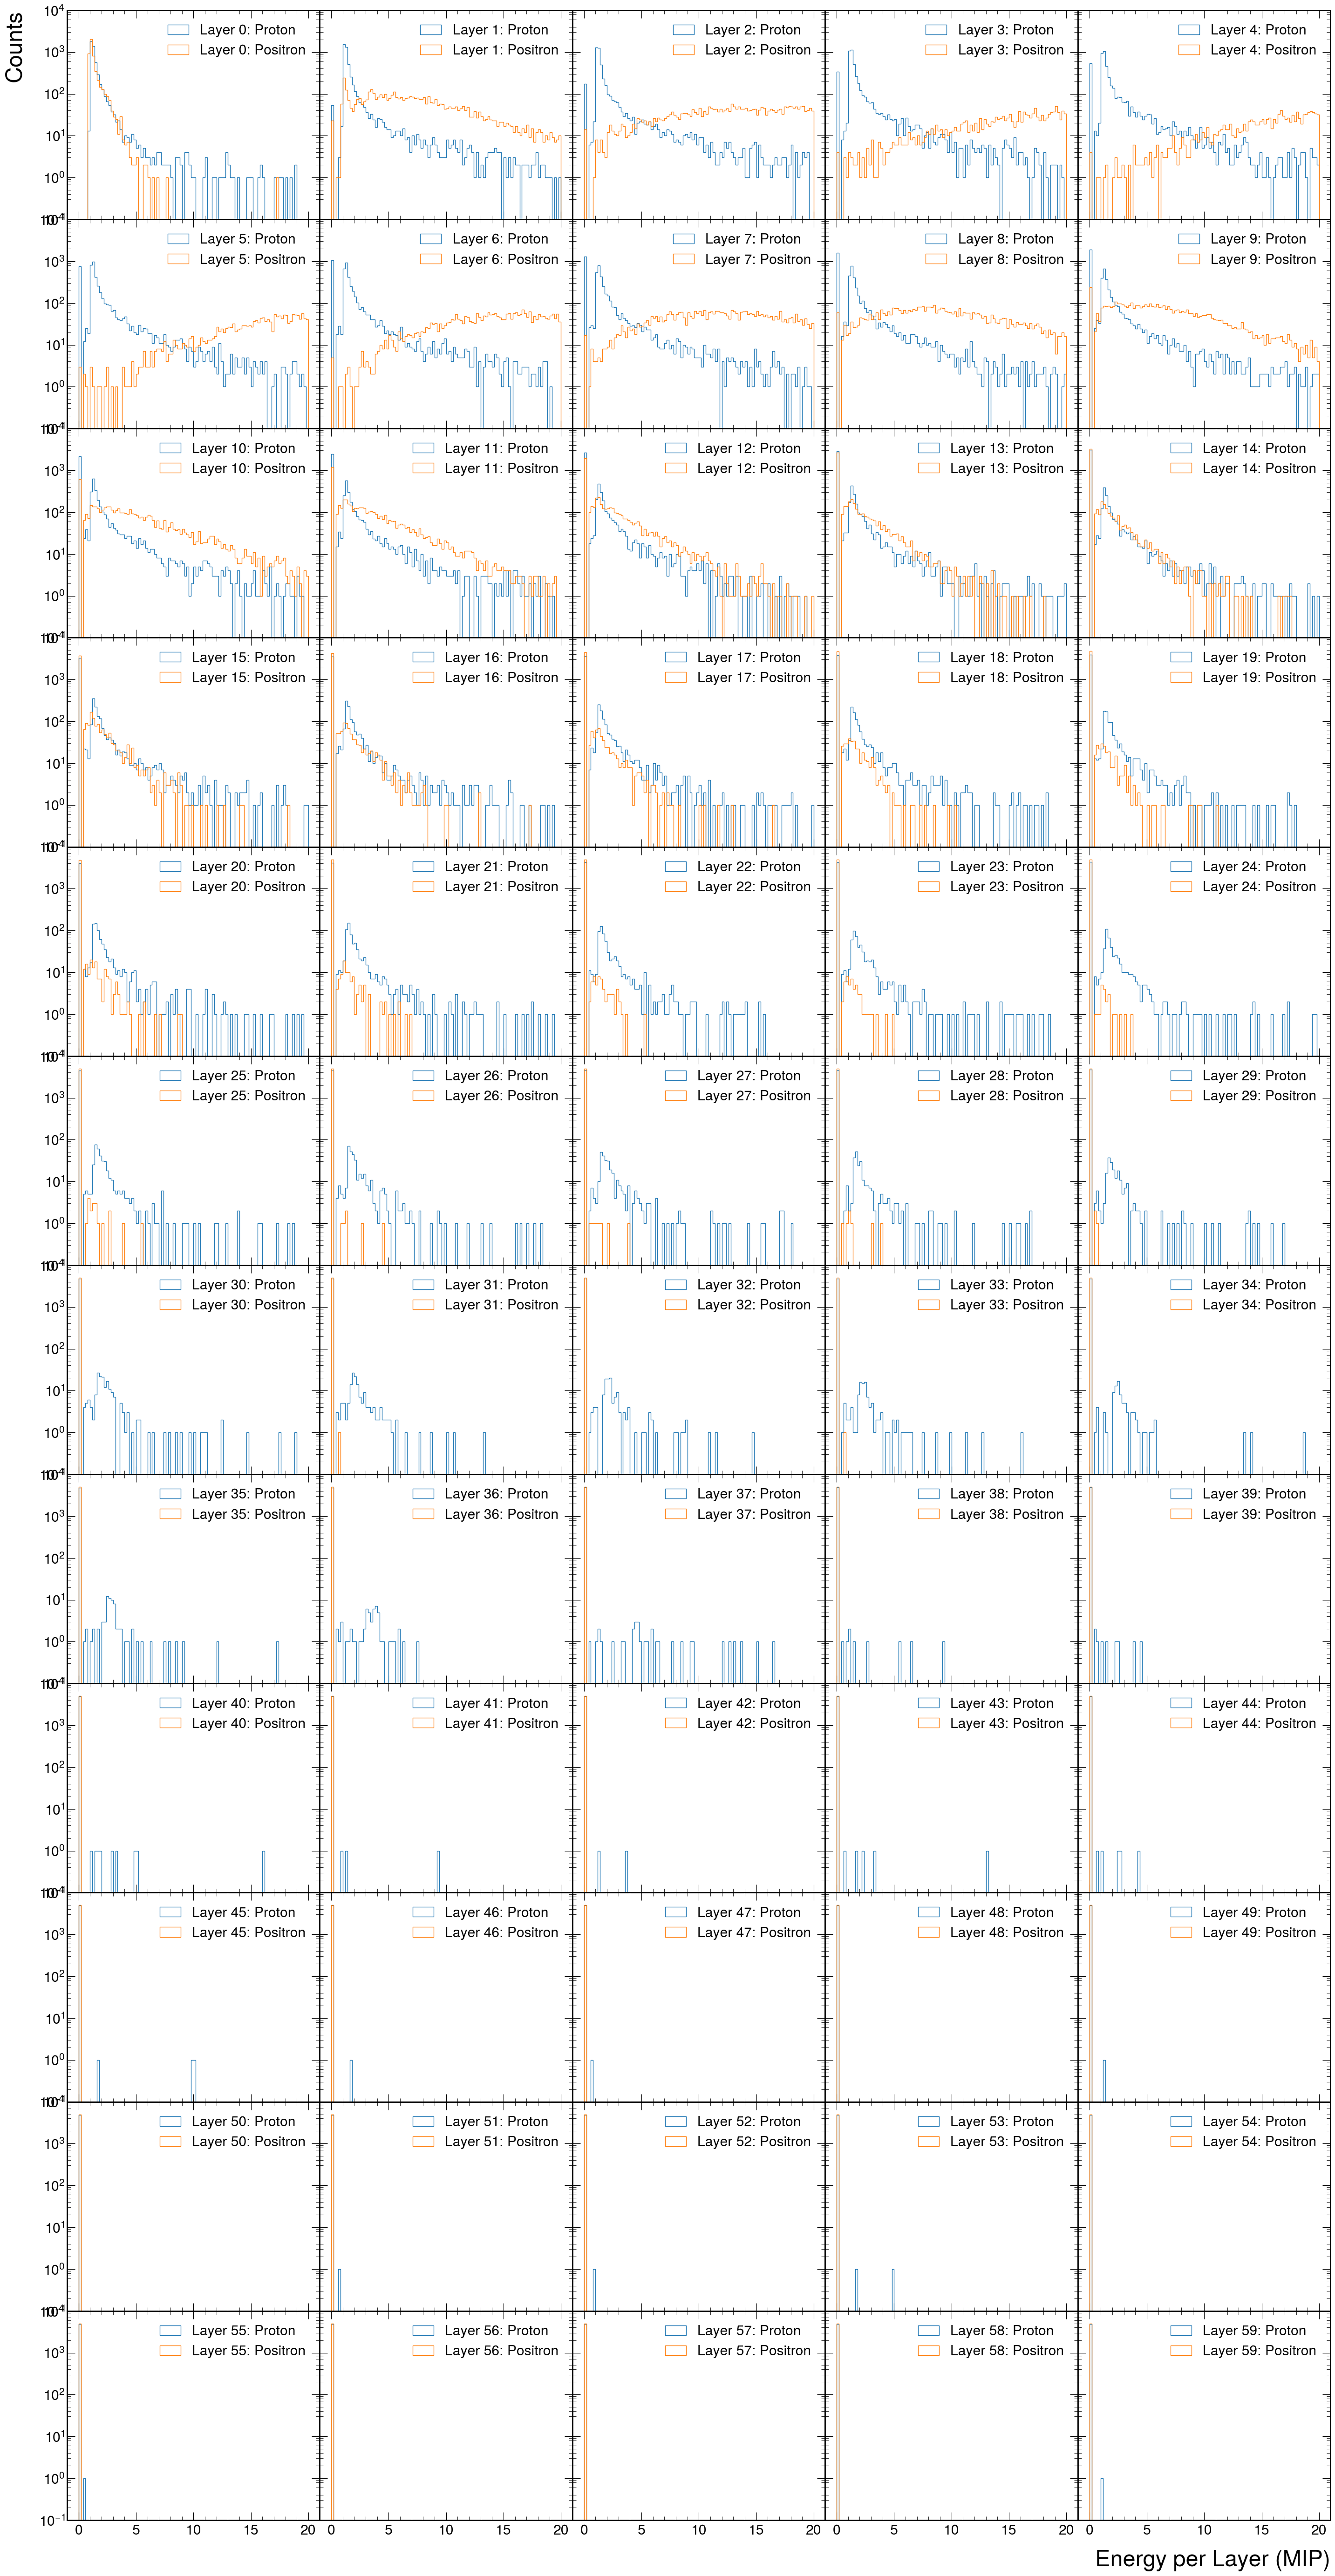

In [6]:
layers = []
layers_zero = []
trigger_cut_proton = [True if len(cells)==2 else False for cells in (arrays['proton']['TriggerHits.energy'] > 0.5*MIP_trigger/1000)]
trigger_cut_positron = [True if len(cells)==2 else False for cells in (arrays['positron']['TriggerHits.energy'] > 0.5*MIP_trigger/1000)]

fig, ax = plt.subplots(12,5,figsize=(35,70),sharex=True,sharey=True)
plt.subplots_adjust(wspace=0, hspace=0)
for i in range(60):
    plt.sca(ax[i//5,i%5])
    cut = (np.abs(arrays['proton']['HcalFarForwardZDCHits.layer'][trigger_cut_proton]-i)<0.1)&(arrays['proton']['HcalFarForwardZDCHits.energy'][trigger_cut_proton]>0.5*MIP/1000)
    b = np.sum(arrays['proton']['HcalFarForwardZDCHits.energy'][trigger_cut_proton][cut], axis=-1)*1000/MIP
    mean = np.mean(b[b>0])
    layers_zero.append(np.mean(b))
    layers.append(mean)
    plt.hist(b, label=f'Layer {i}: Proton',histtype='step',bins=100, density=False,range=(0,20))

    cut = (np.abs(arrays['positron']['HcalFarForwardZDCHits.layer'][trigger_cut_positron]-i)<0.1)&(arrays['positron']['HcalFarForwardZDCHits.energy'][trigger_cut_positron]>0.5*MIP/1000)
    b = np.sum(arrays['positron']['HcalFarForwardZDCHits.energy'][trigger_cut_positron][cut], axis=-1)*1000/MIP
    mean = np.mean(b[b>0])
    layers_zero.append(np.mean(b))
    layers.append(mean)
    plt.hist(b, label=f'Layer {i}: Positron',histtype='step',bins=100, density=False,range=(0,20))

    plt.yscale('log')
    plt.legend()
    plt.ylim(0.1,1e4)

ax[0, 0].set_ylabel('Counts', fontsize=35, labelpad=20)
ax[-1, -1].set_xlabel('Energy per Layer (MIP)', fontsize=35, labelpad=20)
plt.show()

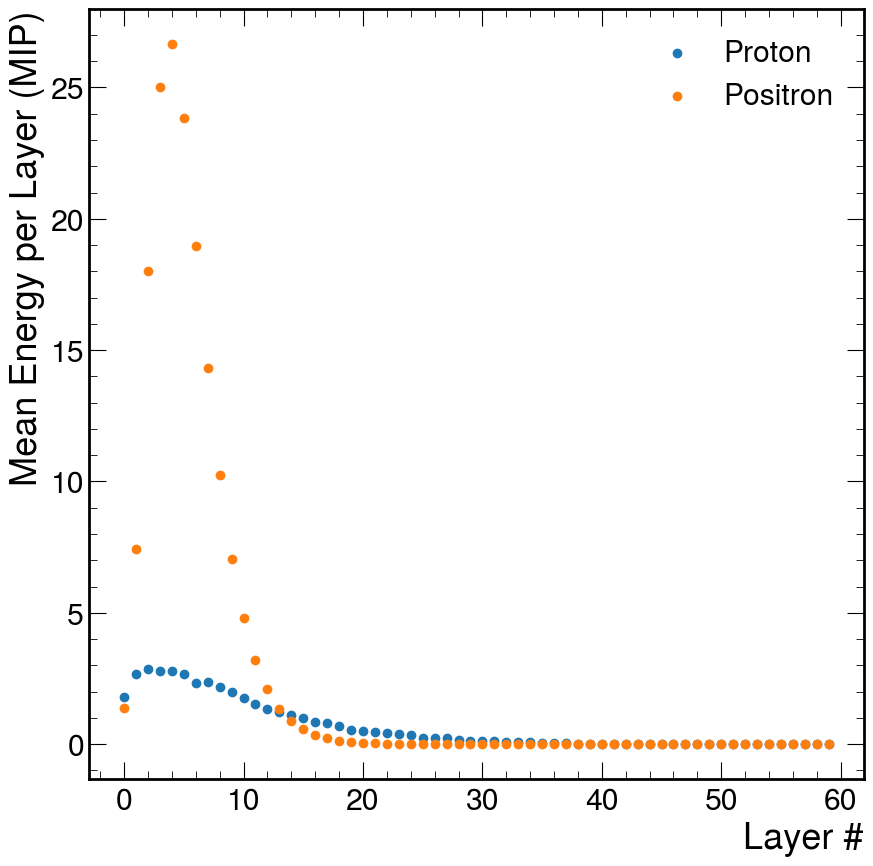

In [7]:
plt.scatter(np.linspace(0,59,60),layers_zero[::2],label='Proton')
plt.scatter(np.linspace(0,59,60),layers_zero[1::2],label='Positron')

#plt.xlim(0,30)
plt.xlabel('Layer #')
plt.ylabel('Mean Energy per Layer (MIP)')
plt.legend()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#for i in range(10):
    #cut = (np.abs(arrays['muon']['HcalFarForwardZDCHits.layer'][i+100]%2)>0.1)
x = ak.flatten(arrays['muon']['HcalFarForwardZDCHits.position.x'][:1000])
y = ak.flatten(arrays['muon']['HcalFarForwardZDCHits.position.y'][:1000])
z = ak.flatten(arrays['muon']['HcalFarForwardZDCHits.position.z'][:1000])
energy = ak.flatten(arrays['muon']['HcalFarForwardZDCHits.energy'][:1000])

scatter = ax.scatter(x, y, z, c=energy/MIP*1000, cmap='viridis', marker='o')
cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Energy per Hit (MIP)')

ax.set_xlabel('X (mm)')
ax.set_ylabel('Y (mm)')
ax.set_zlabel('Z (mm)')

ax.set_xlim(-150,150)
ax.set_ylim(-150,150)
ax.set_zlim(4900,6750)

ax.set_title(f'Hits per Events: {i}')
#ax.view_init(elev=120)

plt.show()